<div class="jumbotron">
  <h1><i class="fa fa-bar-chart" aria-hidden="true"></i> Limpieza de datos</h1>
  <p></p>
</div>

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import os
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline
from mlxtend.preprocessing import standardize
from scipy import stats

# Declaración de variables

In [2]:
organismo ="archaea"
dataset = 4
nombre = ("ds" + str(dataset) + "_" + str(organismo))
nombre2 = (str(organismo)+ " dataset " + str(dataset))
r2 = ("Datos/resultados/"+ str(organismo) + "/" + str(nombre) + "/transformaciones/sin_filtrar")
r3 = ("Datos/resultados/"+ str(organismo) + "/" + str(nombre) + "/transformaciones/sin_atipicos")

nom1 = ("/ds" + str(dataset) + "_AAC_efectores_" + str(organismo) + ".txt")
nom2 = ("/ds" + str(dataset) + "_ACC_hidro_mass_efectores_" + str(organismo) + ".txt")
nom3 = ("/ds" + str(dataset) + "_ACC_mass_efectores_" + str(organismo) + ".txt")
nom4 = ("/ds" + str(dataset) + "_ACC_hidro_efectores_" + str(organismo) + ".txt")
nom5 = ("/ds" + str(dataset) + "_PseAAC_hidro_mass_efectores_" + str(organismo) + ".txt")
nom6 = ("/ds" + str(dataset) + "_PseAAC_mass_efectores_" + str(organismo) + ".txt")
nom7 = ("/ds" + str(dataset) + "_PseAAC_hidro_efectores_" + str(organismo) + ".txt")

nom8 = ("/ds" + str(dataset) + "_AAC_no_efectores_" + str(organismo) + ".txt")
nom9 = ("/ds" + str(dataset) + "_ACC_hidro_mass_no_efectores_" + str(organismo) + ".txt")
nom10 = ("/ds" + str(dataset) + "_ACC_mass_no_efectores_" + str(organismo) + ".txt")
nom11 = ("/ds" + str(dataset) + "_ACC_hidro_no_efectores_" + str(organismo) + ".txt")
nom12 = ("/ds" + str(dataset) + "_PseAAC_hidro_mass_no_efectores_" + str(organismo) + ".txt")
nom13 = ("/ds" + str(dataset) + "_PseAAC_mass_no_efectores_" + str(organismo) + ".txt")
nom14 = ("/ds" + str(dataset) + "_PseAAC_hidro_no_efectores_" + str(organismo) + ".txt")

#Efectores
AAC_efec= pd.read_csv(str(r2) + str(nom1), header=None,prefix='X',sep=',')
ACC_hidro_mass_efec = pd.read_csv(str(r2) + str(nom2), header=None,prefix='X',sep=',')
ACC_mass_efec = pd.read_csv(str(r2) + str(nom3), header=None,prefix='X',sep=',')
ACC_hidro_efec = pd.read_csv(str(r2) + str(nom4), header=None,prefix='X',sep=',')
PseAAC_hidro_mass_efec = pd.read_csv(str(r2) +str(nom5), header=None,prefix='X',sep=',')
PseAAC_mass_efec = pd.read_csv(str(r2) + str(nom6), header=None,prefix='X',sep=',')
PseAAC_hidro_efec = pd.read_csv(str(r2) + str(nom7), header=None,prefix='X',sep=',')

#No efectores
AAC_no_efec= pd.read_csv(str(r2) + str(nom8), header=None,prefix='X',sep=',')
ACC_hidro_mass_no_efec =pd.read_csv(str(r2) + str(nom9), header=None,prefix='X',sep=',')
ACC_mass_no_efec =pd.read_csv(str(r2) + str(nom10), header=None,prefix='X',sep=',')
ACC_hidro_no_efec =pd.read_csv(str(r2) + str(nom11), header=None,prefix='X',sep=',')
PseAAC_hidro_mass_no_efec =pd.read_csv(str(r2) + str(nom12), header=None,prefix='X',sep=',')
PseAAC_mass_no_efec =pd.read_csv(str(r2) + str(nom13), header=None,prefix='X',sep=',')
PseAAC_hidro_no_efec =pd.read_csv(str(r2) + str(nom14), header=None,prefix='X',sep=',')

# Composición de aminoácidos (AAC)

efectores
Composición de aminoácidos (AAC) efectores archaea dataset 4, con valores atípicos.
Valores del documento csv.

         X0     X1     X2      X3     X4      X5     X6      X7     X8  \
0    10.920  5.172  3.161   3.161  0.000   7.184  4.023   6.322  0.575   
1    12.000  6.286  0.000   5.143  0.571   3.429  1.143   9.143  2.857   
2     5.988  2.994  2.395   3.593  1.198  10.778  1.796   4.192  2.395   
3    15.217  3.986  2.536   6.159  0.000   5.072  1.087   7.971  2.174   
4    15.278  5.556  0.694   6.481  0.231   4.630  2.315  12.037  0.694   
..      ...    ...    ...     ...    ...     ...    ...     ...    ...   
995   9.827  8.671  2.312   2.890  0.578  15.029  1.734   7.514  1.734   
996   9.350  8.537  2.439   7.724  0.813   8.943  2.846   2.846  2.439   
997   5.667  5.667  4.667   7.667  0.667   9.667  1.333   2.333  2.333   
998   6.364  7.727  1.818   3.636  0.000   8.182  4.091   6.818  1.364   
999   8.726  7.783  2.358  13.443  0.943  10.613  3.538   8.726 

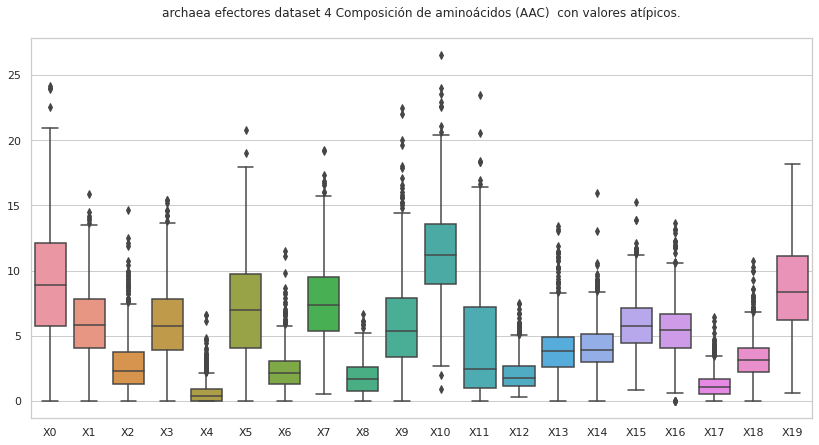

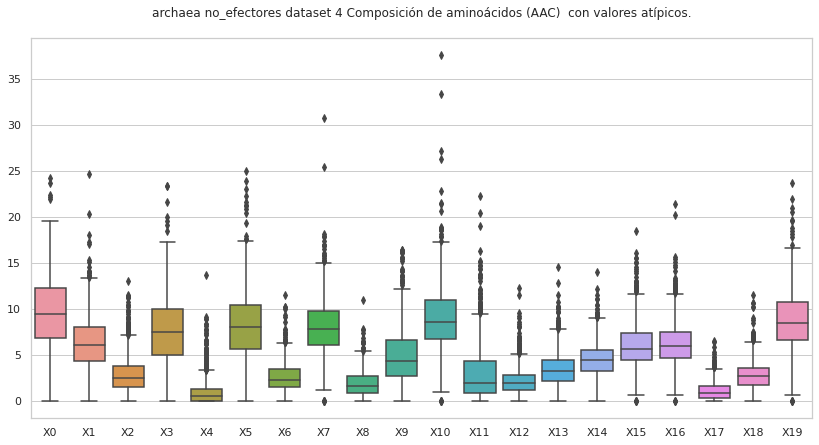

In [3]:
transf = "Composición de aminoácidos (AAC) "
etiq="efectores "
estado = "con valores atípicos.\n"
df=""

for etiq in "efectores", "no_efectores":    
    titulo = (str(transf) + str(etiq) + " " + str(nombre2) + ", " +str(estado))
    print (str(etiq))

    if etiq == "efectores":
        df=AAC_efec
        
    if etiq == "no_efectores":
        df=AAC_no_efec    
    
    #del df['X20']
    print (str(titulo) + "Valores del documento csv.\n")    
    print (df)
    print ("\n\n" + str(titulo) + "Estadísticas.\n")
    print(df.describe())
    print ("\n\n")

    #Gráfica de caja y bigotes    
    sns.set(style="whitegrid")
    fig , ax = plt.subplots(figsize=(14,7))
    ax = sns.boxplot(data=df)
    ax.set_title(organismo +' '+str(etiq) +" dataset "+ str(dataset)+" "+str(transf)+" "+str(estado))

## Composición de aminoácidos (AAC), sin valores atípicos

efectores
Composición de aminoácidos (AAC) efectores archaea dataset 4, sin valores atípicos.
Valores del documento csv.

         X0     X1     X2      X3     X4      X5     X6      X7     X8  \
0    10.920  5.172  3.161   3.161  0.000   7.184  4.023   6.322  0.575   
1    12.000  6.286  0.000   5.143  0.571   3.429  1.143   9.143  2.857   
2     5.988  2.994  2.395   3.593  1.198  10.778  1.796   4.192  2.395   
3    15.217  3.986  2.536   6.159  0.000   5.072  1.087   7.971  2.174   
4    15.278  5.556  0.694   6.481  0.231   4.630  2.315  12.037  0.694   
..      ...    ...    ...     ...    ...     ...    ...     ...    ...   
995   9.827  8.671  2.312   2.890  0.578  15.029  1.734   7.514  1.734   
996   9.350  8.537  2.439   7.724  0.813   8.943  2.846   2.846  2.439   
997   5.667  5.667  4.667   7.667  0.667   9.667  1.333   2.333  2.333   
998   6.364  7.727  1.818   3.636  0.000   8.182  4.091   6.818  1.364   
999   8.726  7.783  2.358  13.443  0.943  10.613  3.538   8.726 

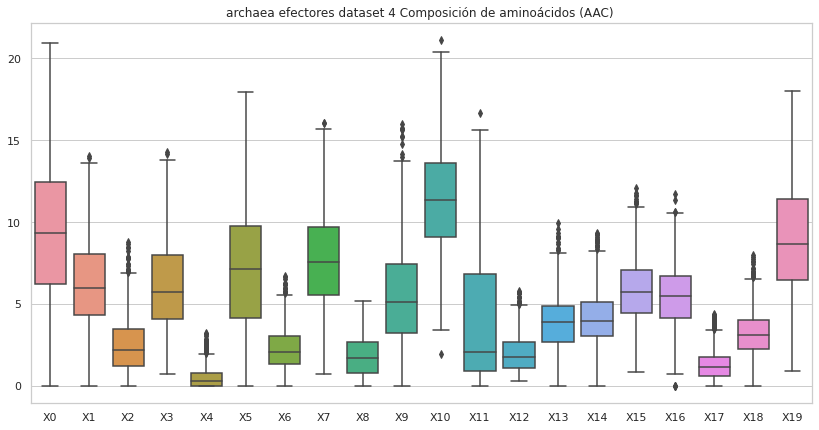

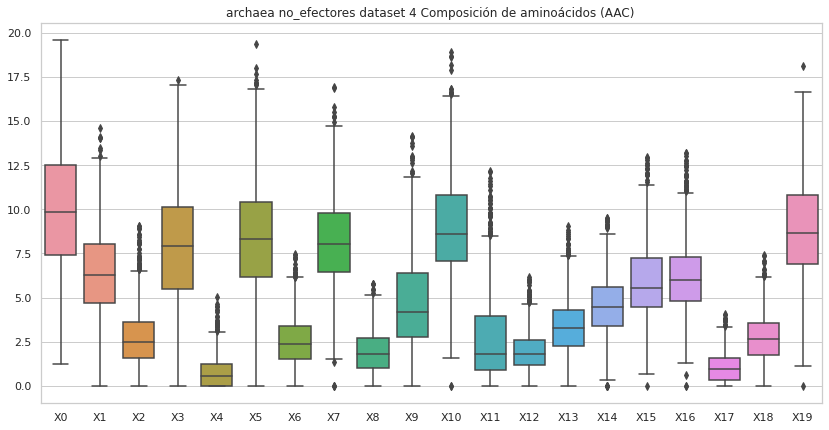

In [4]:
transf = "Composición de aminoácidos (AAC) "
estado = "sin valores atípicos.\n"
transf2="AAC"

out = (str(r3) + '/ds' + str(dataset) + '_' + str(transf2) + '_' + str(organismo) + '.csv')
os.makedirs(str(r3), exist_ok=True)
df=""
df_out = pd.DataFrame()


for etiq in "efectores", "no_efectores":    
    titulo = (str(transf) + str(etiq) + " " + str(nombre2) + ", " +str(estado))
    print (str(etiq))

    if etiq == "efectores":
        df=AAC_efec
        
    if etiq == "no_efectores":
        df=AAC_no_efec   
    
    del df['X20']
    #Se eliminan todas las filas que tengan valores atípicos en al menos una de sus columnas.
    df = (df[(np.abs(stats.zscore(df)) < 3).all(axis=1)])

    df['X20'] = etiq    
    df_out = pd.concat([df_out,df])
    
    #Guarda la lista csv sin valores atípicos.
    df_out.to_csv(str(out), index=False, header=False)
    
    
    
    print (str(titulo) + "Valores del documento csv.\n")    
    print (df)
    print ("\n\n" + str(titulo) + "Estadísticas.\n")
    print(df.describe())
    print ("\n\n")

    #Gráfica de caja y bigotes    
    sns.set(style="whitegrid")
    fig , ax = plt.subplots(figsize=(14,7))
    ax = sns.boxplot(data=df)
    ax.set_title(organismo +' '+str(etiq) +" dataset "+ str(dataset)+" "+str(transf))

# Composición de pseudo aminoácidos (PseAAC) hidro_mass

efectores
Composición de pseudo aminoácidos (PseAAC)  hidro_mass efectores archaea dataset 4, con valores atípicos.
Valores del documento csv.

           X0        X1        X2        X3        X4        X5        X6  \
0    0.020607  0.000000  0.005965  0.013557  0.010303  0.011930  0.001085   
1    0.034328  0.001635  0.014712  0.009808  0.011443  0.026155  0.008173   
2    0.018712  0.003742  0.011227  0.033682  0.007485  0.013098  0.007485   
3    0.026948  0.000000  0.010907  0.008983  0.010266  0.014115  0.003850   
4    0.018842  0.000285  0.007993  0.005710  0.004853  0.014845  0.000856   
..        ...       ...       ...       ...       ...       ...       ...   
995  0.045000  0.002647  0.013235  0.068824  0.018529  0.034412  0.007941   
996  0.062345  0.005421  0.051502  0.059634  0.016264  0.018975  0.016264   
997  0.038694  0.004552  0.052351  0.066008  0.031866  0.015933  0.015933   
998  0.033451  0.000000  0.019115  0.043008  0.011947  0.035840  0.007168   
999  0.02

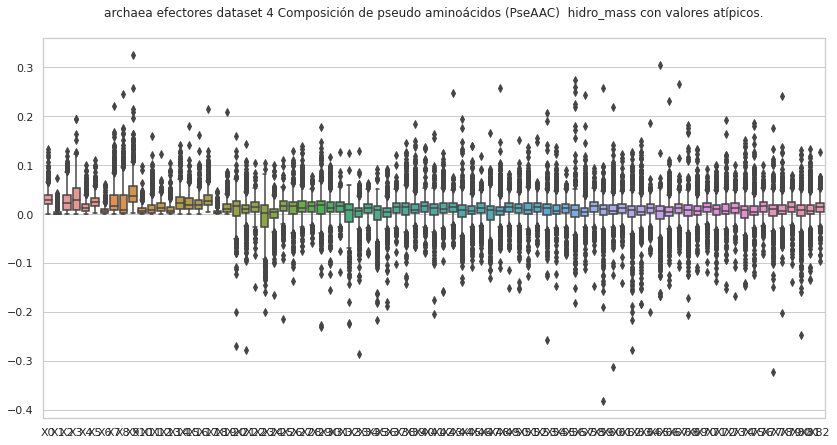

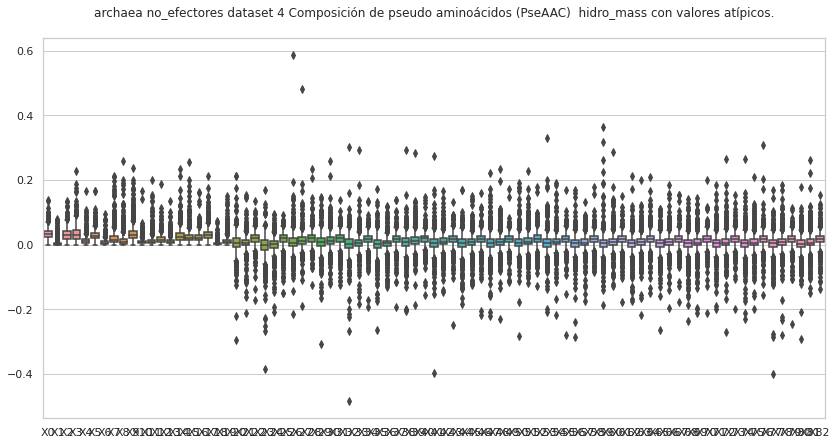

In [5]:
#hidro_mass
transf = "Composición de pseudo aminoácidos (PseAAC) "
transf2 = "PseAAC"
estado = "con valores atípicos.\n"
comp = "hidro_mass"
df=""

for etiq in "efectores", "no_efectores":
    titulo = (str(transf)+" "+ str(comp)+" "+ str(etiq) + " "+ str(nombre2) +", " + str(estado))
    print (str(etiq))

    if etiq == "efectores":
        df=PseAAC_hidro_mass_efec

    if etiq == "no_efectores":
        df=PseAAC_hidro_mass_no_efec

    #del df['X83']
    print (str(titulo) + "Valores del documento csv.\n")    
    print (df)
    print ("\n\n" + str(titulo) + "Estadísticas.\n")
    print(df.describe())
    print ("\n\n")

    #Gráfica de caja y bigotes    
    sns.set(style="whitegrid")
    fig , ax = plt.subplots(figsize=(14,7))
    ax = sns.boxplot(data=df)
    ax.set_title(organismo +' '+str(etiq)+" dataset "+str(dataset)+" "+str(transf)+" "+str(comp)+" "+str(estado))

## Composición de pseudo aminoácidos (PseAAC) hidro_mass, sin valores atípicos

efectores
Composición de pseudo aminoácidos (PseAAC)  hidro_mass efectores archaea dataset 4, sin valores atípicos.
Valores del documento csv.

           X0        X1        X2        X3        X4        X5        X6  \
0    0.020607  0.000000  0.005965  0.013557  0.010303  0.011930  0.001085   
1    0.034328  0.001635  0.014712  0.009808  0.011443  0.026155  0.008173   
2    0.018712  0.003742  0.011227  0.033682  0.007485  0.013098  0.007485   
3    0.026948  0.000000  0.010907  0.008983  0.010266  0.014115  0.003850   
4    0.018842  0.000285  0.007993  0.005710  0.004853  0.014845  0.000856   
..        ...       ...       ...       ...       ...       ...       ...   
994  0.021092  0.007031  0.007031  0.028123  0.000000  0.028123  0.000000   
995  0.045000  0.002647  0.013235  0.068824  0.018529  0.034412  0.007941   
996  0.062345  0.005421  0.051502  0.059634  0.016264  0.018975  0.016264   
998  0.033451  0.000000  0.019115  0.043008  0.011947  0.035840  0.007168   
999  0.02

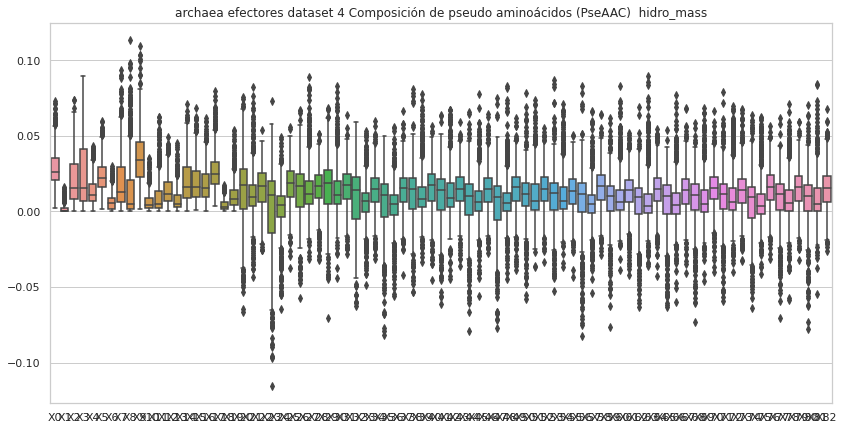

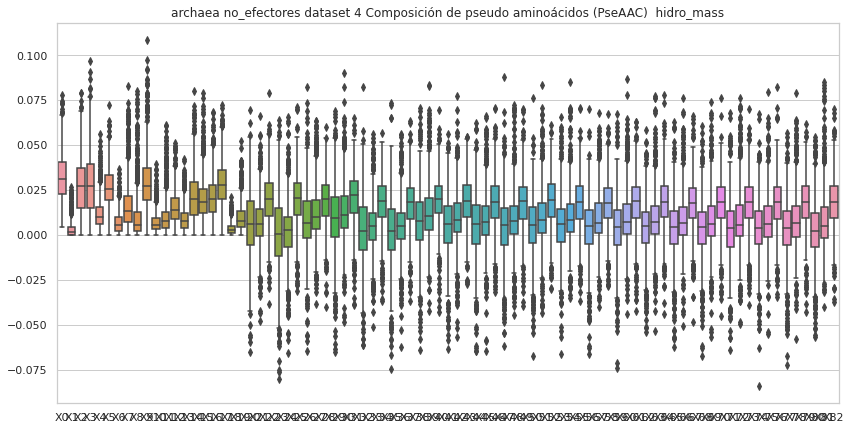

In [6]:
#hidro_mass
transf = "Composición de pseudo aminoácidos (PseAAC) "
transf2 = "PseAAC"
estado = "sin valores atípicos.\n"
comp = "hidro_mass"
df=""

out = (str(r3) + '/ds' + str(dataset) + '_' + str(transf2) + '_' + str(comp) + '_' + str(organismo) + '.csv')
os.makedirs(str(r3), exist_ok=True)
df_out = pd.DataFrame()


for etiq in "efectores", "no_efectores":
    titulo = (str(transf)+" "+ str(comp)+" "+ str(etiq) + " "+ str(nombre2) +", " + str(estado))
    print (str(etiq))

    if etiq == "efectores":
        df=PseAAC_hidro_mass_efec

    if etiq == "no_efectores":
        df=PseAAC_hidro_mass_no_efec

    del df['X83']
    #Se eliminan todas las filas que tengan valores atípicos en al menos una de sus columnas.
    df = (df[(np.abs(stats.zscore(df)) < 3).all(axis=1)])
    df['X83'] = etiq    
    df_out = pd.concat([df_out,df])
    
    #Guarda la lista csv sin valores atípicos.
    df_out.to_csv(str(out), index=False, header=False)
    
    
    print (str(titulo) + "Valores del documento csv.\n")    
    print (df)
    print ("\n\n" + str(titulo) + "Estadísticas.\n")
    print(df.describe())
    print ("\n\n")

    #Gráfica de caja y bigotes    
    sns.set(style="whitegrid")
    fig , ax = plt.subplots(figsize=(14,7))
    ax = sns.boxplot(data=df)
    ax.set_title(organismo +' '+str(etiq)+" dataset "+str(dataset)+" "+str(transf)+" "+str(comp))

# Composición de pseudo aminoácidos (PseAAC) mass

efectores
Composición de pseudo aminoácidos (PseAAC)  mass efectores archaea dataset 4, con valores atípicos.
Valores del documento csv.

           X0        X1        X2        X3        X4        X5        X6  \
0    0.046579  0.000000  0.013483  0.030644  0.023290  0.026967  0.002452   
1    0.057973  0.002761  0.024846  0.016564  0.019324  0.044170  0.013803   
2    0.039807  0.007961  0.023884  0.071653  0.015923  0.027865  0.015923   
3    0.055195  0.000000  0.022341  0.018398  0.021027  0.028912  0.007885   
4    0.038296  0.000580  0.016247  0.011605  0.009864  0.030173  0.001741   
..        ...       ...       ...       ...       ...       ...       ...   
995  0.084424  0.004966  0.024831  0.129119  0.034763  0.064560  0.014898   
996  0.076709  0.006670  0.063369  0.073374  0.020011  0.023346  0.020011   
997  0.055974  0.006585  0.075730  0.095486  0.046097  0.023048  0.023048   
998  0.037362  0.000000  0.021350  0.048037  0.013344  0.040031  0.008006   
999  0.046876  

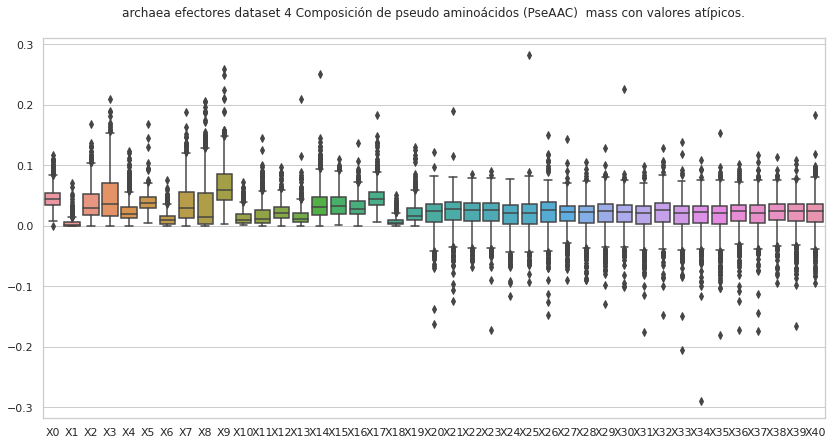

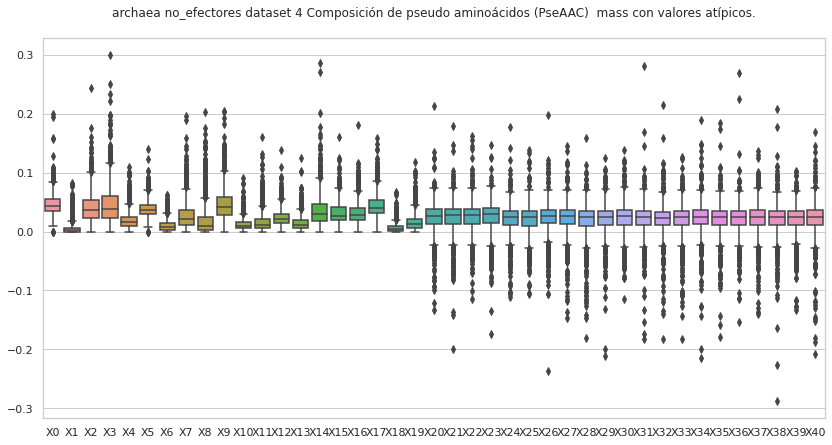

In [7]:
#mass
transf = "Composición de pseudo aminoácidos (PseAAC) "
transf2 = "PseAAC"
estado = "con valores atípicos.\n"
comp = "mass"
df=""

for etiq in "efectores", "no_efectores":
    titulo = (str(transf)+" "+ str(comp)+" "+ str(etiq) + " "+ str(nombre2) +", " + str(estado))
    print (str(etiq))

    if etiq == "efectores":
        df=PseAAC_mass_efec

    if etiq == "no_efectores":
        df=PseAAC_mass_no_efec

    #del df['X41']
    print (str(titulo) + "Valores del documento csv.\n")    
    print (df)
    print ("\n\n" + str(titulo) + "Estadísticas.\n")
    print(df.describe())
    print ("\n\n")

    #Gráfica de caja y bigotes    
    sns.set(style="whitegrid")
    fig , ax = plt.subplots(figsize=(14,7))
    ax = sns.boxplot(data=df)
    ax.set_title(organismo +' '+str(etiq)+" dataset "+str(dataset)+" "+str(transf)+" "+str(comp)+" "+str(estado))

## Composición de pseudo aminoácidos (PseAAC) mass, sin valores atípicos

Composición de pseudo aminoácidos (PseAAC)  mass efectores archaea dataset 4, sin valores atípicos.
Valores del documento csv.

           X0        X1        X2        X3        X4        X5        X6  \
0    0.046579  0.000000  0.013483  0.030644  0.023290  0.026967  0.002452   
1    0.057973  0.002761  0.024846  0.016564  0.019324  0.044170  0.013803   
2    0.039807  0.007961  0.023884  0.071653  0.015923  0.027865  0.015923   
3    0.055195  0.000000  0.022341  0.018398  0.021027  0.028912  0.007885   
4    0.038296  0.000580  0.016247  0.011605  0.009864  0.030173  0.001741   
..        ...       ...       ...       ...       ...       ...       ...   
994  0.023042  0.007681  0.007681  0.030723  0.000000  0.030723  0.000000   
995  0.084424  0.004966  0.024831  0.129119  0.034763  0.064560  0.014898   
996  0.076709  0.006670  0.063369  0.073374  0.020011  0.023346  0.020011   
998  0.037362  0.000000  0.021350  0.048037  0.013344  0.040031  0.008006   
999  0.046876  0.005068  

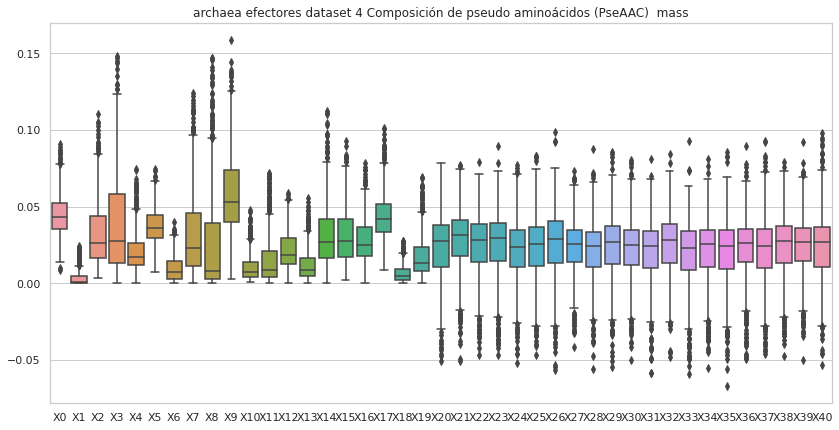

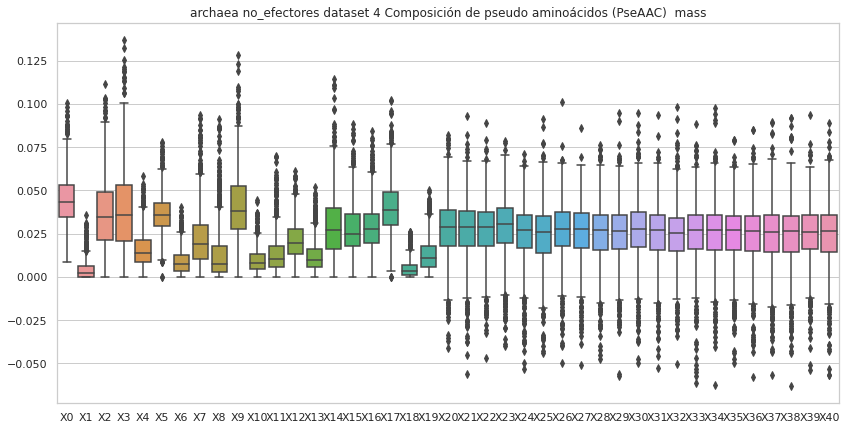

In [8]:
#mass
transf = "Composición de pseudo aminoácidos (PseAAC) "
transf2 = "PseAAC"
estado = "sin valores atípicos.\n"
comp = "mass"
df=""

out = (str(r3) + '/ds' + str(dataset) + '_' + str(transf2) + '_' + str(comp) + '_' + str(organismo) + '.csv')
os.makedirs(str(r3), exist_ok=True)
df_out = pd.DataFrame()

for etiq in "efectores", "no_efectores":
    titulo = (str(transf)+" "+ str(comp)+" "+ str(etiq) + " "+ str(nombre2) +", " + str(estado))

    if etiq == "efectores":
        df=PseAAC_mass_efec

    if etiq == "no_efectores":
        df=PseAAC_mass_no_efec

    del df['X41']
    df = (df[(np.abs(stats.zscore(df)) < 3).all(axis=1)])
    df['X41'] = etiq
    df_out = pd.concat([df_out,df])
    
    #Guarda la lista csv sin valores atípicos.
    df_out.to_csv(str(out), index=False, header=False)
    
    print (str(titulo) + "Valores del documento csv.\n")    
    print (df)
    print ("\n\n" + str(titulo) + "Estadísticas.\n")
    print(df.describe())
    print ("\n\n")

    #Gráfica de caja y bigotes    
    sns.set(style="whitegrid")
    fig , ax = plt.subplots(figsize=(14,7))
    ax = sns.boxplot(data=df)
    ax.set_title(organismo +' '+str(etiq)+" dataset "+str(dataset)+" "+str(transf)+" "+str(comp))

# Composición de pseudo aminoácidos (PseAAC) hidro

efectores
Composición de pseudo aminoácidos (PseAAC)  hidro efectores archaea dataset 4, con valores atípicos.
Valores del documento csv.

           X0        X1        X2        X3        X4        X5        X6  \
0    0.027611  0.000000  0.007993  0.018165  0.013806  0.015985  0.001453   
1    0.049468  0.002356  0.021201  0.014134  0.016489  0.037690  0.011778   
2    0.022212  0.004442  0.013327  0.039982  0.008885  0.015549  0.008885   
3    0.039119  0.000000  0.015834  0.013040  0.014902  0.020491  0.005588   
4    0.029845  0.000452  0.012661  0.009044  0.007687  0.023514  0.001357   
..        ...       ...       ...       ...       ...       ...       ...   
995  0.048653  0.002862  0.014310  0.074411  0.020034  0.037205  0.008586   
996  0.072997  0.006348  0.060302  0.069823  0.019043  0.022217  0.019043   
997  0.039024  0.004591  0.052797  0.066570  0.032137  0.016069  0.016069   
998  0.053067  0.000000  0.030324  0.068229  0.018953  0.056858  0.011372   
999  0.041860 

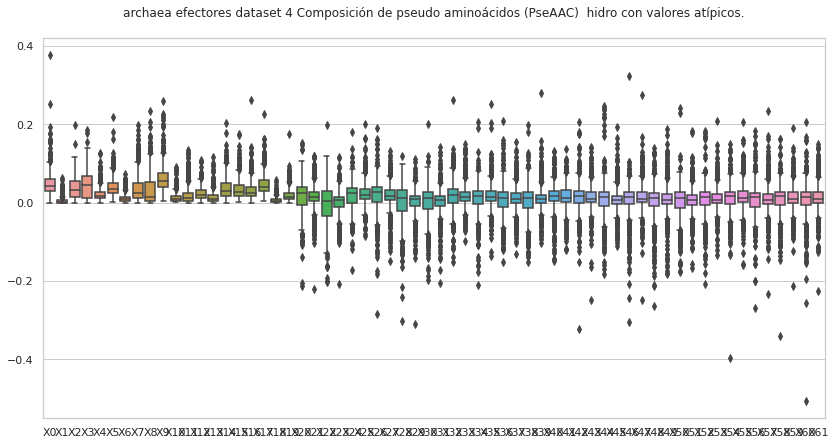

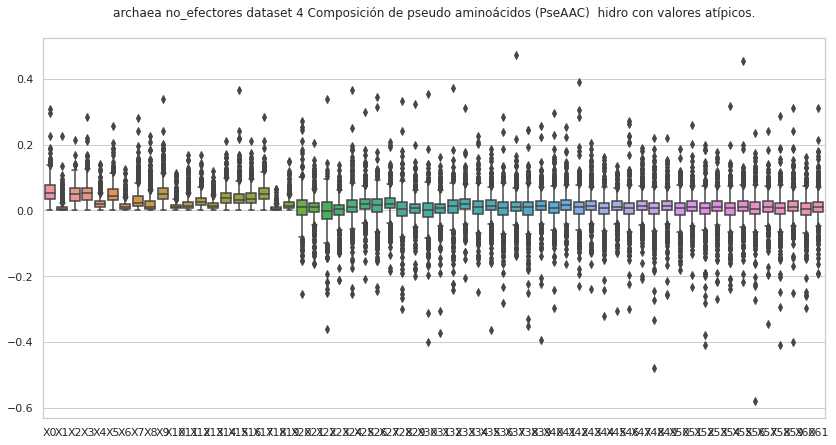

In [9]:
#hidro
transf = "Composición de pseudo aminoácidos (PseAAC) "
transf2 = "PseAAC"
estado = "con valores atípicos.\n"
comp = "hidro"
df=""

for etiq in "efectores", "no_efectores":
    titulo = (str(transf)+" "+ str(comp)+" "+ str(etiq) + " "+ str(nombre2) +", " + str(estado))
    print (str(etiq))

    if etiq == "efectores":
        df=PseAAC_hidro_efec

    if etiq == "no_efectores":
        df=PseAAC_hidro_no_efec

    #del df['X62']
    print (str(titulo) + "Valores del documento csv.\n")    
    print (df)
    print ("\n\n" + str(titulo) + "Estadísticas.\n")
    print(df.describe())
    print ("\n\n")

    #Gráfica de caja y bigotes    
    sns.set(style="whitegrid")
    fig , ax = plt.subplots(figsize=(14,7))
    ax = sns.boxplot(data=df)
    ax.set_title(organismo +' '+str(etiq)+" dataset "+str(dataset)+" "+str(transf)+" "+str(comp)+" "+str(estado))

## Composición de pseudo aminoácidos (PseAAC) hidro, sin valores atípicos

efectores
Composición de pseudo aminoácidos (PseAAC)  efectores archaea dataset 4, sin valores atípicos.
Valores del documento csv.

           X0        X1        X2        X3        X4        X5        X6  \
0    0.027611  0.000000  0.007993  0.018165  0.013806  0.015985  0.001453   
1    0.049468  0.002356  0.021201  0.014134  0.016489  0.037690  0.011778   
2    0.022212  0.004442  0.013327  0.039982  0.008885  0.015549  0.008885   
3    0.039119  0.000000  0.015834  0.013040  0.014902  0.020491  0.005588   
4    0.029845  0.000452  0.012661  0.009044  0.007687  0.023514  0.001357   
..        ...       ...       ...       ...       ...       ...       ...   
993  0.024076  0.000000  0.010834  0.010032  0.008427  0.021668  0.000803   
995  0.048653  0.002862  0.014310  0.074411  0.020034  0.037205  0.008586   
996  0.072997  0.006348  0.060302  0.069823  0.019043  0.022217  0.019043   
997  0.039024  0.004591  0.052797  0.066570  0.032137  0.016069  0.016069   
999  0.041860  0.004

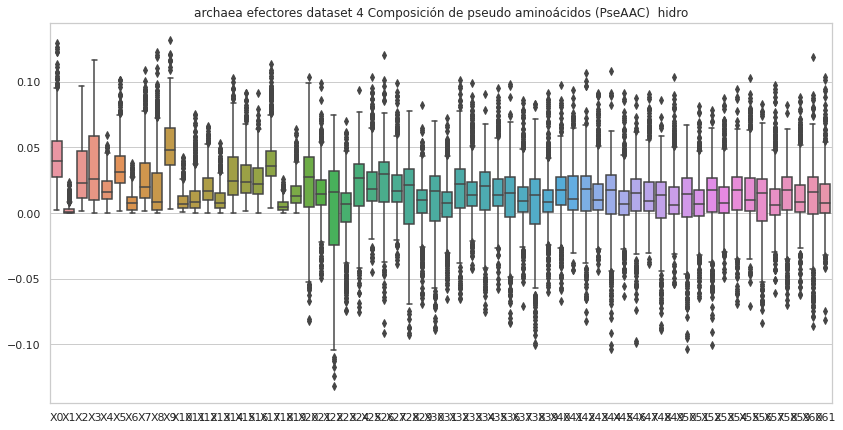

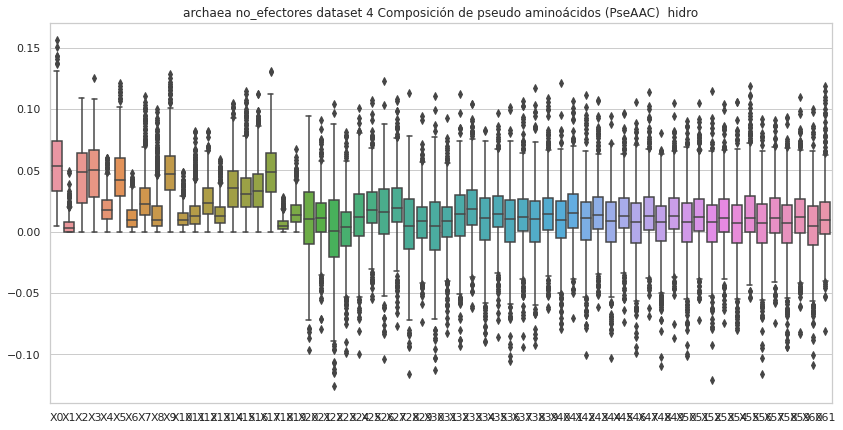

In [10]:
#hidro
transf = "Composición de pseudo aminoácidos (PseAAC) "
transf2 = "PseAAC"
estado = "sin valores atípicos.\n"
comp = "hidro"
df=""

out = (str(r3) + '/ds' + str(dataset) + '_' + str(transf2) + '_' + str(comp) + '_' + str(organismo) + '.csv')
os.makedirs(str(r3), exist_ok=True)
df_out = pd.DataFrame()


for etiq in "efectores", "no_efectores":
    titulo = (str(transf) +" "+ str(etiq) + " " + str(nombre2) + ", " + str(estado))
    print (str(etiq))

    if etiq == "efectores":
        df=PseAAC_hidro_efec

    if etiq == "no_efectores":
        df=PseAAC_hidro_no_efec

    del df['X62']
    #Se eliminan todas las filas que tengan valores atípicos en al menos una de sus columnas.
    df = (df[(np.abs(stats.zscore(df)) < 3).all(axis=1)])
    df['X62'] = etiq    
    df_out = pd.concat([df_out,df]) 
    
    #Guarda la lista csv sin valores atípicos.
    df_out.to_csv(str(out), index=False, header=False)
    
    
    print (str(titulo) + "Valores del documento csv.\n")    
    print (df)
    print ("\n\n" + str(titulo) + "Estadísticas.\n")
    print(df.describe())
    print ("\n\n")

    #Gráfica de caja y bigotes    
    sns.set(style="whitegrid")
    fig , ax = plt.subplots(figsize=(14,7))
    ax = sns.boxplot(data=df)
    ax.set_title(organismo +' '+str(etiq)+" dataset "+str(dataset)+" "+str(transf)+" "+str(comp))

# Covarianza de auto cruzamiento (ACC) hidro_mass

efectores
Covarianza de auto cruzamiento (ACC)  hidro_mass efectores archaea dataset 4, con valores atípicos.
Valores del documento csv.

           X0        X1        X2        X3        X4        X5        X6  \
0   -0.001255  0.024772  0.105252  0.027670  0.004654  0.100112  0.071641   
1    0.056264 -0.037222 -0.012612 -0.002320 -0.075573 -0.002453 -0.112878   
2    0.048471  0.009440  0.039151  0.036947  0.022486  0.029969  0.006779   
3    0.037604  0.038714 -0.030308  0.053671 -0.083895 -0.061327  0.043566   
4    0.038873  0.080391  0.042054  0.061625  0.008376  0.051868  0.068299   
..        ...       ...       ...       ...       ...       ...       ...   
995 -0.107209 -0.047024 -0.125564  0.067282 -0.027618  0.065714 -0.113395   
996  0.040378 -0.042663 -0.081736 -0.017018 -0.111148 -0.081607 -0.044643   
997 -0.019178 -0.059432 -0.016089 -0.028522  0.040618 -0.041040  0.030537   
998 -0.013216  0.084164 -0.010332  0.081858  0.013480  0.042177 -0.051119   
999 -0.114142 -

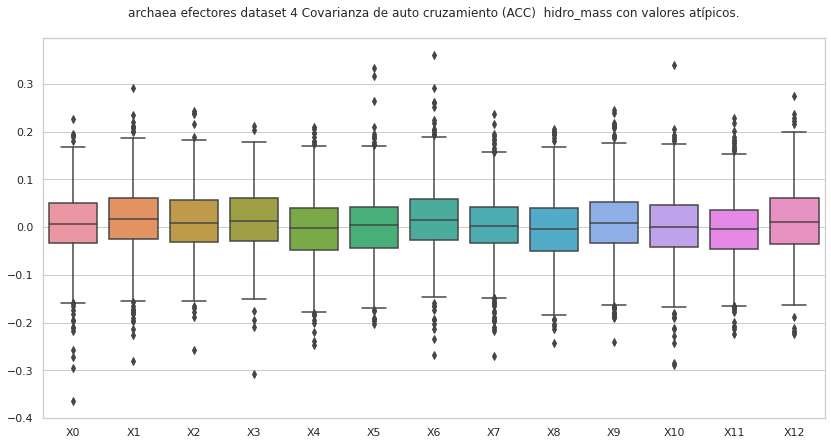

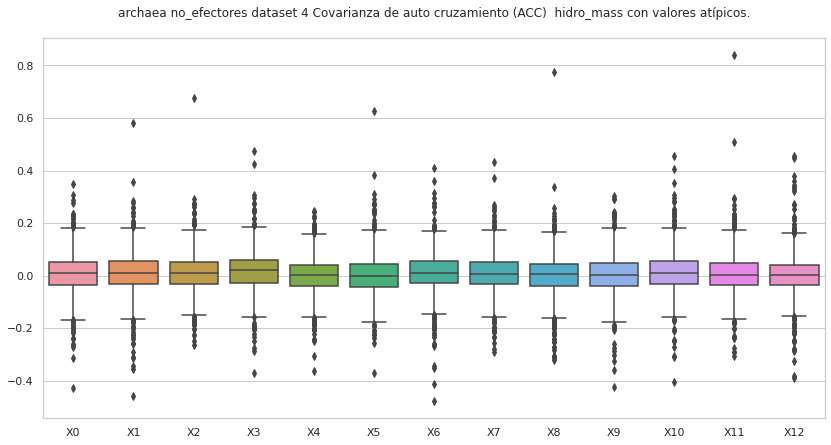

In [11]:
#hidro_mass
transf = "Covarianza de auto cruzamiento (ACC) "
transf2 = "ACC"
estado = "con valores atípicos.\n"
comp = "hidro_mass"
df=""

for etiq in "efectores", "no_efectores":
    titulo = (str(transf)+" "+ str(comp)+" "+ str(etiq) + " "+ str(nombre2) +", " + str(estado))
    print (str(etiq))

    if etiq == "efectores":
        df=ACC_hidro_mass_efec

    if etiq == "no_efectores":
        df=ACC_hidro_mass_no_efec

    #del df['X13']
    print (str(titulo) + "Valores del documento csv.\n")    
    print (df)
    print ("\n\n" + str(titulo) + "Estadísticas.\n")
    print(df.describe())
    print ("\n\n")

    #Gráfica de caja y bigotes    
    sns.set(style="whitegrid")
    fig , ax = plt.subplots(figsize=(14,7))
    ax = sns.boxplot(data=df)
    ax.set_title(organismo +' '+str(etiq)+" dataset "+str(dataset)+" "+str(transf)+" "+str(comp)+" "+str(estado))

## Covarianza de auto cruzamiento (ACC) hidro_mass, sin valores atípicos

efectores
Covarianza de auto cruzamiento (ACC)  hidro_mass efectores archaea dataset 4, sin valores atípicos.
Valores del documento csv.

           X0        X1        X2        X3        X4        X5        X6  \
0   -0.001255  0.024772  0.105252  0.027670  0.004654  0.100112  0.071641   
1    0.056264 -0.037222 -0.012612 -0.002320 -0.075573 -0.002453 -0.112878   
2    0.048471  0.009440  0.039151  0.036947  0.022486  0.029969  0.006779   
3    0.037604  0.038714 -0.030308  0.053671 -0.083895 -0.061327  0.043566   
4    0.038873  0.080391  0.042054  0.061625  0.008376  0.051868  0.068299   
..        ...       ...       ...       ...       ...       ...       ...   
995 -0.107209 -0.047024 -0.125564  0.067282 -0.027618  0.065714 -0.113395   
996  0.040378 -0.042663 -0.081736 -0.017018 -0.111148 -0.081607 -0.044643   
997 -0.019178 -0.059432 -0.016089 -0.028522  0.040618 -0.041040  0.030537   
998 -0.013216  0.084164 -0.010332  0.081858  0.013480  0.042177 -0.051119   
999 -0.114142 -

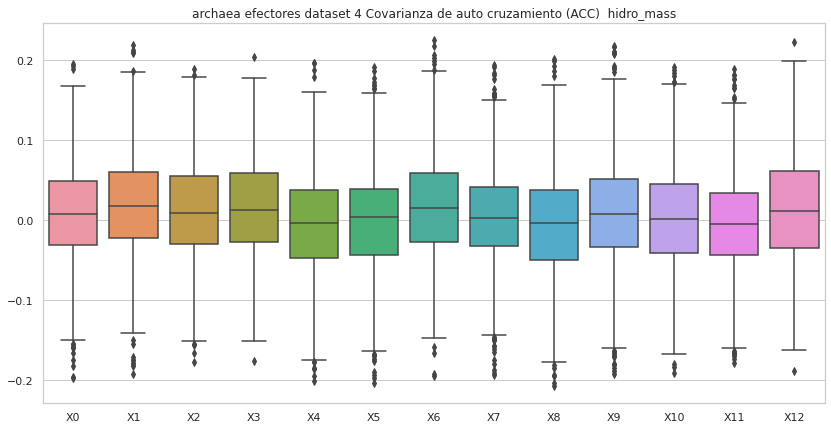

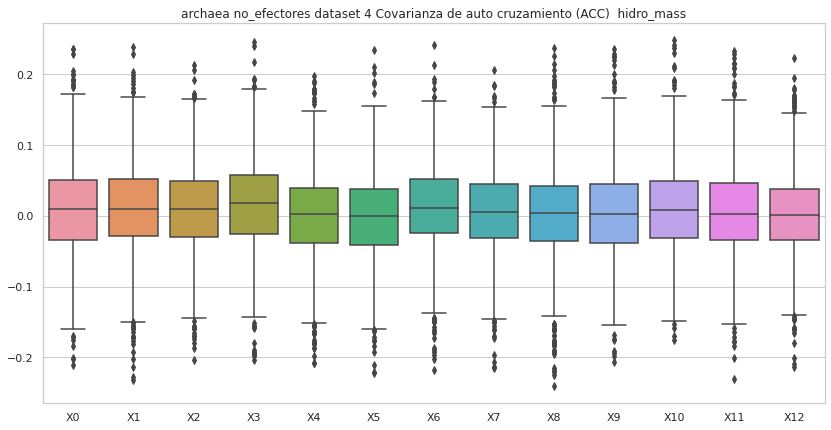

In [12]:
#hidro_mass
transf = "Covarianza de auto cruzamiento (ACC) "
transf2 = "ACC"
estado = "sin valores atípicos.\n"
comp = "hidro_mass"
df=""

out = (str(r3) + '/ds' + str(dataset) + '_' + str(transf2) + '_' + str(comp) + '_' + str(organismo) + '.csv')
os.makedirs(str(r3), exist_ok=True)
df_out = pd.DataFrame()

for etiq in "efectores", "no_efectores":
    titulo = (str(transf)+" "+ str(comp)+" "+ str(etiq) + " "+ str(nombre2) +", " + str(estado))
    print (str(etiq))

    if etiq == "efectores":
        df=ACC_hidro_mass_efec

    if etiq == "no_efectores":
        df=ACC_hidro_mass_no_efec

    del df['X13']
    #Se eliminan todas las filas que tengan valores atípicos en al menos una de sus columnas.
    df = (df[(np.abs(stats.zscore(df)) < 3).all(axis=1)])
    df['X13'] = etiq    
    df_out = pd.concat([df_out,df]) 
    
    #Guarda la lista csv sin valores atípicos.
    df_out.to_csv(str(out), index=False, header=False)

    print (str(titulo) + "Valores del documento csv.\n")    
    print (df)
    print ("\n\n" + str(titulo) + "Estadísticas.\n")
    print(df.describe())
    print ("\n\n")

    #Gráfica de caja y bigotes    
    sns.set(style="whitegrid")
    fig , ax = plt.subplots(figsize=(14,7))
    ax = sns.boxplot(data=df)
    ax.set_title(organismo +' '+str(etiq)+" dataset "+str(dataset)+" "+str(transf)+" "+str(comp))

# Covarianza de auto cruzamiento (ACC) mass

efectores
Covarianza de auto cruzamiento (ACC)  mass efectores archaea dataset 4, con valores atípicos.
Valores del documento csv.

           X0        X1        X2        X3        X4        X5        X6  \
0   -0.001255  0.024772  0.105252  0.027670  0.004654  0.100112  0.071641   
1    0.056264 -0.037222 -0.012612 -0.002320 -0.075573 -0.002453 -0.112878   
2    0.048471  0.009440  0.039151  0.036947  0.022486  0.029969  0.006779   
3    0.037604  0.038714 -0.030308  0.053671 -0.083895 -0.061327  0.043566   
4    0.038873  0.080391  0.042054  0.061625  0.008376  0.051868  0.068299   
..        ...       ...       ...       ...       ...       ...       ...   
995 -0.107209 -0.047024 -0.125564  0.067282 -0.027618  0.065714 -0.113395   
996  0.040378 -0.042663 -0.081736 -0.017018 -0.111148 -0.081607 -0.044643   
997 -0.019178 -0.059432 -0.016089 -0.028522  0.040618 -0.041040  0.030537   
998 -0.013216  0.084164 -0.010332  0.081858  0.013480  0.042177 -0.051119   
999 -0.114142 -0.0337

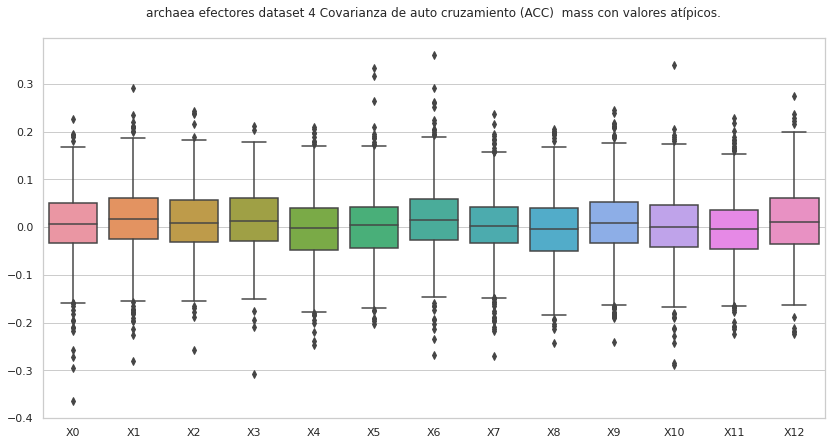

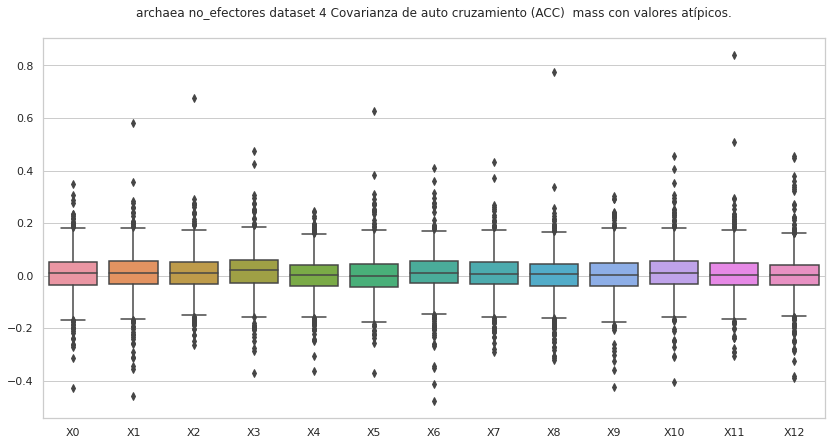

In [13]:
#mass
transf = "Covarianza de auto cruzamiento (ACC) "
transf2 = "ACC"
estado = "con valores atípicos.\n"
comp = "mass"
df=""

for etiq in "efectores", "no_efectores":
    titulo = (str(transf)+" "+ str(comp)+" "+ str(etiq) + " "+ str(nombre2) +", " + str(estado))
    print (str(etiq))

    if etiq == "efectores":
        df=ACC_mass_efec

    if etiq == "no_efectores":
        df=ACC_mass_no_efec

    #del df['X13']
    print (str(titulo) + "Valores del documento csv.\n")    
    print (df)
    print ("\n\n" + str(titulo) + "Estadísticas.\n")
    print(df.describe())
    print ("\n\n")

    #Gráfica de caja y bigotes    
    sns.set(style="whitegrid")
    fig , ax = plt.subplots(figsize=(14,7))
    ax = sns.boxplot(data=df)
    ax.set_title(organismo +' '+str(etiq)+" dataset "+str(dataset)+" "+str(transf)+" "+str(comp)+" "+str(estado))

## Covarianza de auto cruzamiento (ACC) mass, sin valores atípicos

Covarianza de auto cruzamiento (ACC)  mass efectores archaea dataset 4, sin valores atípicos.
Valores del documento csv.

           X0        X1        X2        X3        X4        X5        X6  \
0   -0.001255  0.024772  0.105252  0.027670  0.004654  0.100112  0.071641   
1    0.056264 -0.037222 -0.012612 -0.002320 -0.075573 -0.002453 -0.112878   
2    0.048471  0.009440  0.039151  0.036947  0.022486  0.029969  0.006779   
3    0.037604  0.038714 -0.030308  0.053671 -0.083895 -0.061327  0.043566   
4    0.038873  0.080391  0.042054  0.061625  0.008376  0.051868  0.068299   
..        ...       ...       ...       ...       ...       ...       ...   
995 -0.107209 -0.047024 -0.125564  0.067282 -0.027618  0.065714 -0.113395   
996  0.040378 -0.042663 -0.081736 -0.017018 -0.111148 -0.081607 -0.044643   
997 -0.019178 -0.059432 -0.016089 -0.028522  0.040618 -0.041040  0.030537   
998 -0.013216  0.084164 -0.010332  0.081858  0.013480  0.042177 -0.051119   
999 -0.114142 -0.033796  0.0617

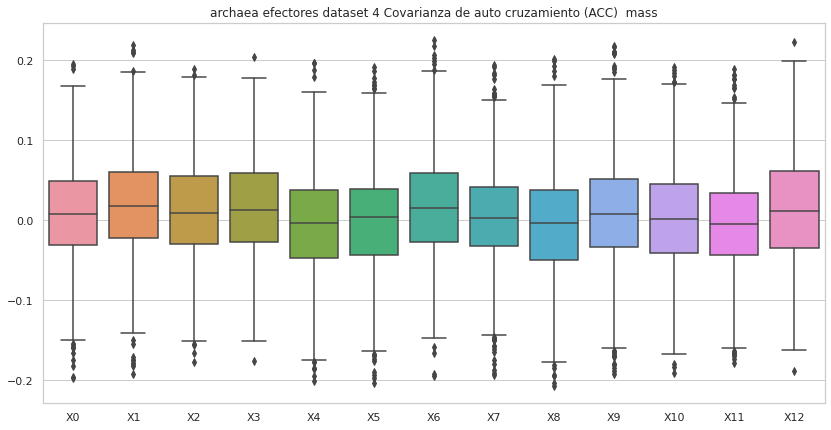

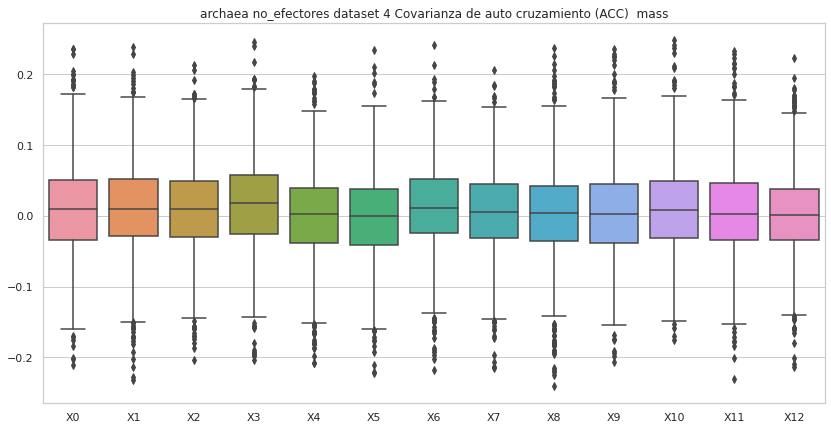

In [14]:
#mass
transf = "Covarianza de auto cruzamiento (ACC) "
transf2 = "ACC"
estado = "sin valores atípicos.\n"
comp = "mass"
df=""

#Se eliminan todas las filas que tengan valores atípicos en al menos una de sus columnas.
out = (str(r3) + '/ds' + str(dataset) + '_' + str(transf2) + '_' + str(comp) + '_' + str(organismo) + '.csv')
os.makedirs(str(r3), exist_ok=True)
df=""
df_out = pd.DataFrame()

for etiq in "efectores", "no_efectores":
    titulo = (str(transf)+" "+ str(comp)+" "+ str(etiq) + " "+ str(nombre2) +", " + str(estado))

    if etiq == "efectores":
        df=ACC_mass_efec

    if etiq == "no_efectores":
        df=ACC_mass_no_efec

    del df['X13']
    #Se eliminan todas las filas que tengan valores atípicos en al menos una de sus columnas.
    df = (df[(np.abs(stats.zscore(df)) < 3).all(axis=1)])
    df['X13'] = etiq    
    df_out = pd.concat([df_out,df]) 
    
    #Guarda la lista csv sin valores atípicos.
    df_out.to_csv(str(out), index=False, header=False)    

    print (str(titulo) + "Valores del documento csv.\n")    
    print (df)
    print ("\n\n" + str(titulo) + "Estadísticas.\n")
    print(df.describe())
    print ("\n\n")

    #Gráfica de caja y bigotes    
    sns.set(style="whitegrid")
    fig , ax = plt.subplots(figsize=(14,7))
    ax = sns.boxplot(data=df)
    ax.set_title(organismo +' '+str(etiq)+" dataset "+str(dataset)+" "+str(transf)+" "+str(comp))

# Covarianza de auto cruzamiento (ACC) hidro

efectores
Covarianza de auto cruzamiento (ACC)  hidro efectores archaea dataset 4, con valores atípicos.
Valores del documento csv.

           X0        X1        X2        X3        X4        X5        X6  \
0    0.073103  0.047888  0.229624  0.133804  0.138406  0.096016  0.133291   
1    0.132197  0.087201  0.173566  0.004457 -0.089030 -0.081952 -0.043823   
2    0.206988  0.038727  0.160886  0.167273  0.158495  0.193430  0.163025   
3    0.190966  0.013306  0.108509  0.120342  0.051260  0.106575  0.200362   
4    0.181216  0.102647  0.220701  0.205972  0.173005  0.118284  0.187037   
..        ...       ...       ...       ...       ...       ...       ...   
995  0.086148 -0.159448  0.183191  0.088856 -0.057810  0.074775 -0.007516   
996  0.034801 -0.186235 -0.061274  0.045300 -0.116021 -0.095504 -0.137011   
997 -0.024582 -0.284761  0.033355  0.174170 -0.137643 -0.031865  0.132479   
998  0.038964 -0.074190  0.052857 -0.020411 -0.172907 -0.046421 -0.100797   
999 -0.057342 -0.059

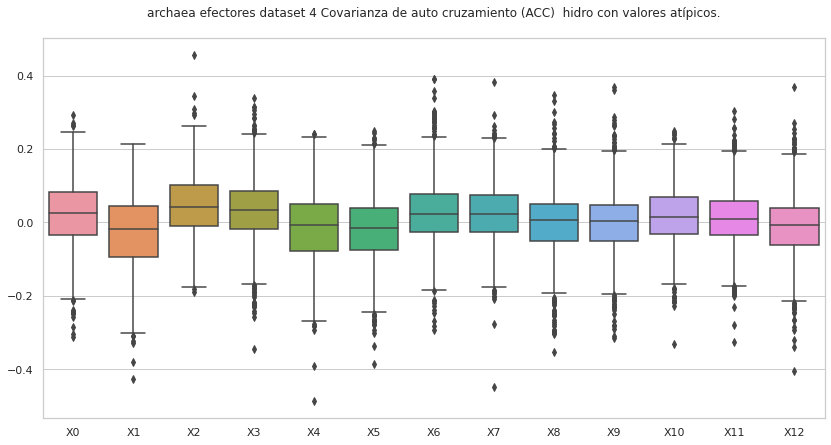

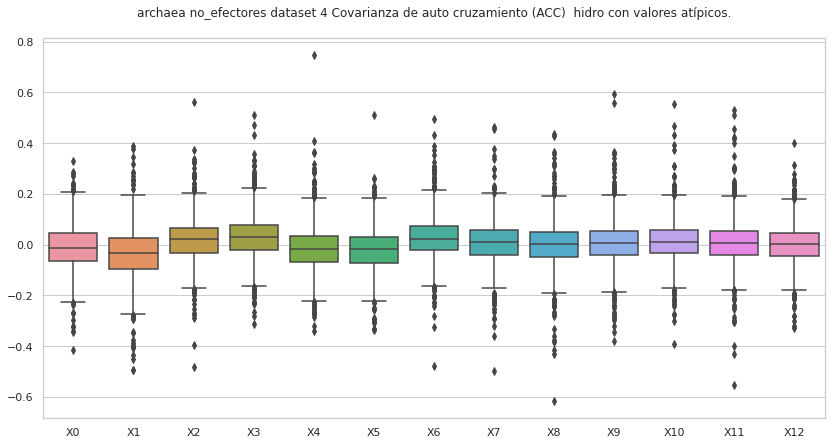

In [15]:
#hidro
transf = "Covarianza de auto cruzamiento (ACC) "
transf2 = "ACC"
estado = "con valores atípicos.\n"
comp = "hidro"
df=""

for etiq in "efectores", "no_efectores":
    titulo = (str(transf)+" "+ str(comp)+" "+ str(etiq) + " "+ str(nombre2) +", " + str(estado))
    print (str(etiq))

    if etiq == "efectores":
        df=ACC_hidro_efec

    if etiq == "no_efectores":
        df=ACC_hidro_no_efec

    #del df['X13']
    print (str(titulo) + "Valores del documento csv.\n")    
    print (df)
    print ("\n\n" + str(titulo) + "Estadísticas.\n")
    print(df.describe())
    print ("\n\n")

    #Gráfica de caja y bigotes    
    sns.set(style="whitegrid")
    fig , ax = plt.subplots(figsize=(14,7))
    ax = sns.boxplot(data=df)
    ax.set_title(organismo +' '+str(etiq)+" dataset "+str(dataset)+" "+str(transf)+" "+str(comp)+" "+str(estado))

## Covarianza de auto cruzamiento (ACC) hidro, sin valores atípicos

efectores
Covarianza de auto cruzamiento (ACC)  efectores archaea dataset 4, sin valores atípicos.
Valores del documento csv.

           X0        X1        X2        X3        X4        X5        X6  \
0    0.073103  0.047888  0.229624  0.133804  0.138406  0.096016  0.133291   
1    0.132197  0.087201  0.173566  0.004457 -0.089030 -0.081952 -0.043823   
2    0.206988  0.038727  0.160886  0.167273  0.158495  0.193430  0.163025   
3    0.190966  0.013306  0.108509  0.120342  0.051260  0.106575  0.200362   
4    0.181216  0.102647  0.220701  0.205972  0.173005  0.118284  0.187037   
..        ...       ...       ...       ...       ...       ...       ...   
995  0.086148 -0.159448  0.183191  0.088856 -0.057810  0.074775 -0.007516   
996  0.034801 -0.186235 -0.061274  0.045300 -0.116021 -0.095504 -0.137011   
997 -0.024582 -0.284761  0.033355  0.174170 -0.137643 -0.031865  0.132479   
998  0.038964 -0.074190  0.052857 -0.020411 -0.172907 -0.046421 -0.100797   
999 -0.057342 -0.059894  0

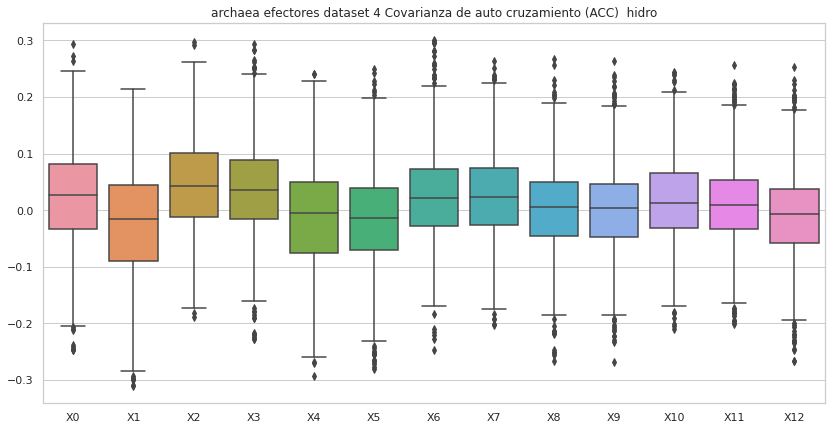

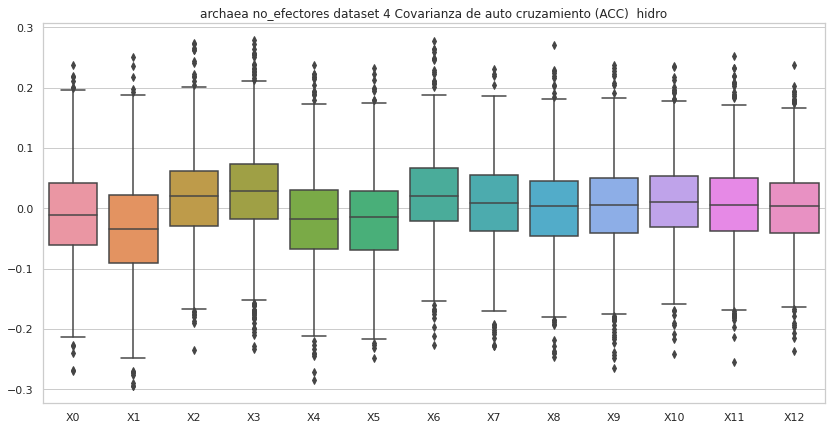

In [16]:
#hidro
transf = "Covarianza de auto cruzamiento (ACC) "
transf2 = "ACC"
estado = "sin valores atípicos.\n"
comp = "hidro"
df=""

out = (str(r3) + '/ds' + str(dataset) + '_' + str(transf2) + '_' + str(comp) + '_' + str(organismo) + '.csv')
os.makedirs(str(r3), exist_ok=True)
df_out = pd.DataFrame()

for etiq in "efectores", "no_efectores":
    titulo = (str(transf) +" "+ str(etiq) + " " + str(nombre2) + ", " + str(estado))
    print (str(etiq))

    if etiq == "efectores":
        df=ACC_hidro_efec

    if etiq == "no_efectores":
        df=ACC_hidro_no_efec

    del df['X13']
    #Se eliminan todas las filas que tengan valores atípicos en al menos una de sus columnas.
    df = (df[(np.abs(stats.zscore(df)) < 3).all(axis=1)])
    df['X13'] = etiq    
    df_out = pd.concat([df_out,df]) 
    
    #Guarda la lista csv sin valores atípicos.
    df_out.to_csv(str(out), index=False, header=False)    
    
    print (str(titulo) + "Valores del documento csv.\n")    
    print (df)
    print ("\n\n" + str(titulo) + "Estadísticas.\n")
    print(df.describe())
    print ("\n\n")

    #Gráfica de caja y bigotes    
    sns.set(style="whitegrid")
    fig , ax = plt.subplots(figsize=(14,7))
    ax = sns.boxplot(data=df)
    ax.set_title(organismo +' '+str(etiq)+" dataset "+str(dataset)+" "+str(transf)+" "+str(comp))